In [36]:
import pandas as pd

thorari = pd.read_csv("./datasets/ThoraricSurgery.csv", header=None)

thorari.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1


In [37]:
thorari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [38]:
thorari.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [39]:
print(thorari.isna().sum().sum())
print(thorari.isnull().sum().sum())

0
0


In [40]:
thorari.iloc[:,-1]

0      0
1      0
2      1
3      1
4      0
      ..
465    0
466    0
467    0
468    1
469    0
Name: 17, Length: 470, dtype: int64

In [41]:
thorari[17].value_counts()

0    400
1     70
Name: 17, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

x = thorari.drop(17, axis=1)
y = thorari[17]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=156)
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(376, 17) (94, 17) (376,) (94,)


In [43]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

* tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np

np.random.seed(3)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(30, input_dim = 17, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss =  "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
history = model.fit(x_train_scale,y_train, epochs = 100, batch_size = 10, validation_split=0.2 )

score = model.evaluate(x_test_scale, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])


Epoch 1/100
30/30 [==============================] - 1s 12ms/step - loss: 0.7115 - accuracy: 0.5433 - val_loss: 0.6612 - val_accuracy: 0.5658
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7900 - val_loss: 0.5761 - val_accuracy: 0.8026
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.8333 - val_loss: 0.5240 - val_accuracy: 0.8421
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.8467 - val_loss: 0.4882 - val_accuracy: 0.8421
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.8533 - val_loss: 0.4696 - val_accuracy: 0.8421
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8567 - val_loss: 0.4570 - val_accuracy: 0.8421
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8567 - val_loss: 0.4486 - val_accuracy: 0.8421
Epoch 8/100


Epoch 59/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.8933 - val_loss: 0.4051 - val_accuracy: 0.8421
Epoch 60/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.8967 - val_loss: 0.4049 - val_accuracy: 0.8421
Epoch 61/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8967 - val_loss: 0.4061 - val_accuracy: 0.8421
Epoch 62/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8967 - val_loss: 0.4089 - val_accuracy: 0.8289
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8967 - val_loss: 0.4090 - val_accuracy: 0.8289
Epoch 64/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2850 - accuracy: 0.8967 - val_loss: 0.4109 - val_accuracy: 0.8289
Epoch 65/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2835 - accuracy: 0.9000 - val_loss: 0.4101 - val_accuracy: 0.8421
Epoch 

In [69]:
hist = history.history

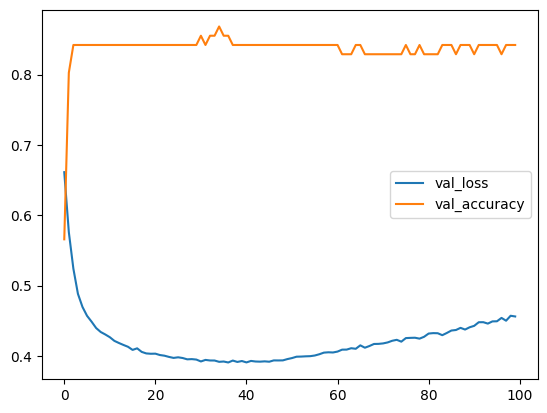

In [70]:
import matplotlib.pyplot as plt

vl = hist["val_loss"]
va = hist["val_accuracy"]

plt.plot(vl, label = "val_loss")
plt.plot(va, label = "val_accuracy")
plt.legend()
plt.show()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np

np.random.seed(3)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(30, input_dim = 17, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss =  "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
history = model.fit(x_train_scale,y_train, epochs = 20, batch_size = 10, validation_split=0.2 )

score = model.evaluate(x_test_scale, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])



Epoch 1/20
30/30 [==============================] - 1s 8ms/step - loss: 0.5104 - accuracy: 0.8033 - val_loss: 0.4837 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.8500 - val_loss: 0.4623 - val_accuracy: 0.8421
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.8500 - val_loss: 0.4532 - val_accuracy: 0.8421
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.8533 - val_loss: 0.4455 - val_accuracy: 0.8421
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.8500 - val_loss: 0.4451 - val_accuracy: 0.8421
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8500 - val_loss: 0.4422 - val_accuracy: 0.8289
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8533 - val_loss: 0.4416 - val_accuracy: 0.8289
Epoch 8/20
30/30 [==

In [75]:
hist = history.history

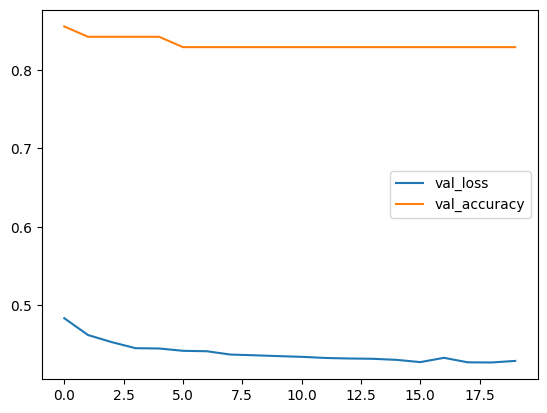

In [76]:
import matplotlib.pyplot as plt

vl = hist["val_loss"]
va = hist["val_accuracy"]

plt.plot(vl, label = "val_loss")
plt.plot(va, label = "val_accuracy")
plt.legend()
plt.show()